In [1]:
cd ~/work/waroncars

/media/wintermute/work/waroncars


In [13]:
plt = plotter()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import toml
import seaborn as sns

In [4]:
import analyzer

In [5]:
config = toml.load('config.toml')

In [6]:
paths = analyzer.date_range(min_time='2022-01-06', max_time='2022-01-06')

In [7]:
tracks = analyzer.load_track(paths)

In [8]:
info = analyzer.track_info(data=tracks).sort_values(by='time')
info['hour'] = info['time'].dt.hour
info = info[info['label'] == 'car']
info = info[info['r2'] >= 0.75]
info = info[info['frames'] >= 5]
info1 = info[(info['hour'] <= 11) & (info['hour'] >= 7)]

In [9]:
info.describe()

,frames,Δt,Δx,Δy,v,σ,r2,hour
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,17.142857,1.207633,0.546019,0.060287,15.868360,0.637935,0.943319,9.021429
std,13.820312,0.900412,0.084035,0.020109,4.625459,0.443481,0.051886,1.879338
min,5.000000,0.479847,0.278906,0.019444,1.579938,0.040915,0.750123,5.000000
25%,12.000000,0.843209,0.491077,0.046528,13.867638,0.311982,0.928383,8.000000
50%,15.000000,1.045554,0.552051,0.055903,16.190186,0.511720,0.962238,9.000000
75%,19.000000,1.250995,0.609778,0.071615,18.709161,0.843500,0.977989,11.000000
max,145.000000,9.754318,0.704883,0.133681,30.273725,2.283842,0.989460,12.000000


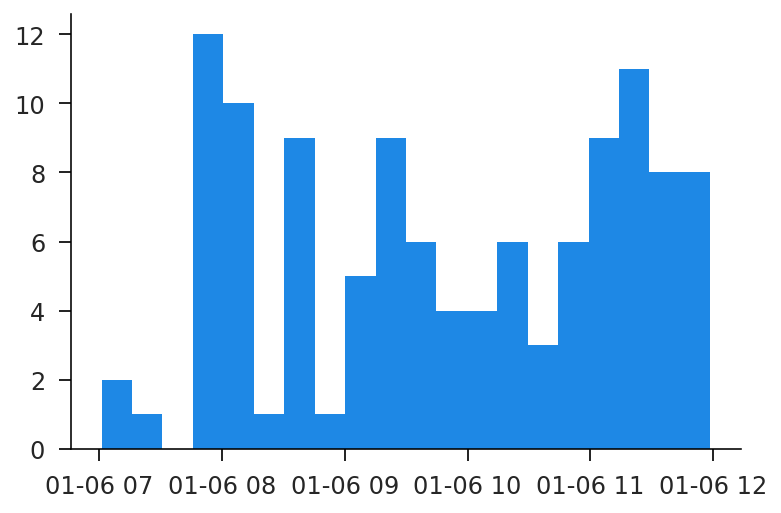

In [10]:
info1['time'].hist(bins=20);

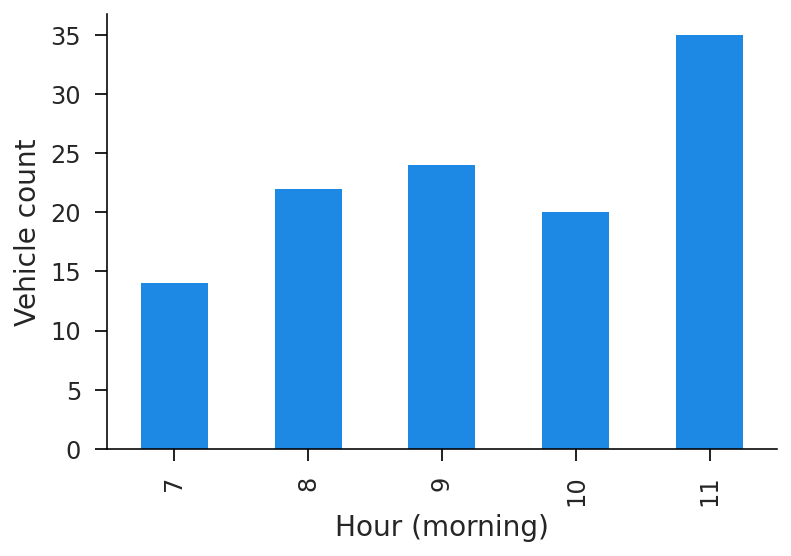

In [27]:
fig, ax = plt.subplots()
counts = info1.groupby('hour').size()
counts.plot.bar(ax=ax);
ax.set_ylabel('Vehicle count'); ax.set_xlabel('Hour (morning)');
fig.savefig('output/hourly_counts.svg', bbox_inches='tight');

In [ ]:
info1.groupby('hour')['v'].max().plot.bar();

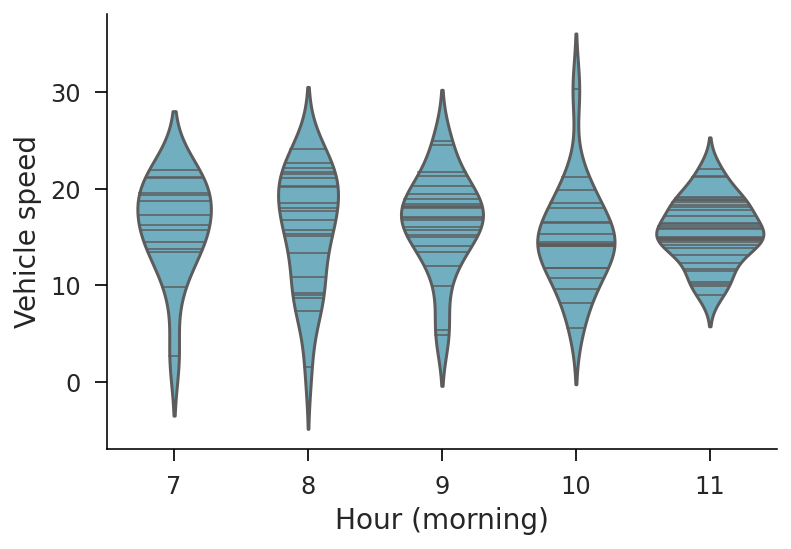

In [25]:
fig, ax = plt.subplots()
sns.violinplot(x='hour', y='v', inner='stick', color=colors[5], linewidth=1.5, data=info1, ax=ax);
ax.set_ylabel('Vehicle speed'); ax.set_xlabel('Hour (morning)');
fig.savefig('output/hourly_speed.svg', bbox_inches='tight');

In [105]:
tr = analyzer.load_track('tracks/20220103T123935_car_1602.csv')

In [106]:
fov = config['scene']['width'], config['scene']['height']

In [107]:
analyzer.calc_speed(tr, fov)

(19.00728613580026, 0.45253585822598336)